## This Comes after DATA EXPLORATION - EDA

In [ ]:
#Pre-processing - Preparing the data to be fed inside the model 80% 
#ML (baby!) - Carefull with what you are feeding..!

In [ ]:
#1. Cleaning the data
#2. Extracting Features out of data

## 1. Data Cleaning

### a. NA values or null values

In [24]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Data/companytest.csv")

“ “, “#N/A”, “#N/A N/A”, “#NA”, “-1.#IND”, “-1.#QNAN”, “-NaN”, “-nan”, “1.#IND”, “1.#QNAN”, “<NA>”, “N/A”, “NA”, “NULL”, “NaN”, “None”, “n/a”, “nan”, “null “.


In [7]:
data.isna().sum()

Company    3
Age        4
Salary     7
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  30 non-null     object 
 1   Age      29 non-null     float64
 2   Salary   26 non-null     float64
dtypes: float64(2), object(1)
memory usage: 920.0+ bytes


In [ ]:
#CHURN ANALYSIS - AIRTEL 
1. How many people will churn away - will the customer churn away... Secondary Phone Number - 30% - Drop the Column 
2. 1 - Churn | 0 - Not Churn - Area 2% 0f the rows Null.. 

1. Filling the NA values... Mean / Median / Mode Imputation
2. Filling K-Nearest-Neighbors - Euclidean Distance 
3. Drop The column..!

In [9]:
data.head()

,Company,Age,Salary
0,b,40.0,9000000.0
1,d,300.0,1000.0
2,a,30.0,-400.0
3,'a',20.0,NaN
4,c,30.0,NaN


In [ ]:
#MODE for non-numeric 
#Mean and Median for numeric

In [ ]:
data['Age'].fillna(data['Age'].median())

In [12]:
import statistics
statistics.mode(data['Company'])

'b'

In [14]:
data['Company'].value_counts()

b      9
a      9
c      8
'a'    2
d      1
'c'    1
Name: Company, dtype: int64

### b. Fixing the impurities

In [15]:
data.head()

,Company,Age,Salary
0,b,40.0,9000000.0
1,d,300.0,1000.0
2,a,30.0,-400.0
3,'a',20.0,NaN
4,c,30.0,NaN


In [16]:
data['Company'] = data['Company'].fillna("Not Specified")
data['Company'] = data['Company'].apply(lambda x: x.replace("'",''))
data['Company'].value_counts()

a                11
b                 9
c                 9
Not Specified     3
d                 1
Name: Company, dtype: int64

In [17]:
data['Age'].describe()

count     29.000000
mean      40.758621
std       50.644881
min       18.000000
25%       23.000000
50%       34.000000
75%       40.000000
max      300.000000
Name: Age, dtype: float64

In [27]:
data['Age'].loc[(data['Age'] > 60) | (data['Age'] < 18)] = np.nan

/var/folders/4n/9tgv1jfx4gd0t44r5_wvrq440000gn/T/ipykernel_4248/2596792221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'].loc[(data['Age'] > 60) | (data['Age'] < 18)] = np.nan


In [ ]:
data['Salary'].describe()

In [45]:
data['Salary'].loc[(data['Salary']< 0)] = np.nan

/var/folders/4n/9tgv1jfx4gd0t44r5_wvrq440000gn/T/ipykernel_4248/891362009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Salary'].loc[(data['Salary']< 0)] = np.nan


In [46]:
data['Salary'].describe()

count    3.300000e+01
mean     2.773583e+05
std      1.565869e+06
min      1.000000e+03
25%      3.030000e+03
50%      4.824000e+03
75%      6.000000e+03
max      9.000000e+06
Name: Salary, dtype: float64

In [33]:
data.head()

,Company,Age,Salary
0,b,40.0,9000000.0
1,d,NaN,1000.0
2,a,30.0,NaN
3,a,20.0,NaN
4,c,30.0,NaN


##### Now Filling Missing values

In [34]:
data['Company'] = data['Company'].apply(lambda x: x.replace("Not Specified",data['Company'].mode()[0]))

In [35]:
data.isna().sum()

Company    0
Age        5
Salary     8
dtype: int64

In [36]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [37]:
data['Salary'] = data['Salary'].fillna(data['Salary'].median())

In [38]:
data.isna().sum()

Company    0
Age        0
Salary     0
dtype: int64

In [39]:
data.head()

,Company,Age,Salary
0,b,40.0,9000000.0
1,d,33.0,1000.0
2,a,30.0,4824.0
3,a,20.0,4824.0
4,c,30.0,4824.0


### 3. Outliers

In [56]:
#NOTE
#If you think these values are true values from real life fix missing with KNN or median and proceed
#If you think outliers are impurities then fix!!!

In [55]:
numerical_cols = data.select_dtypes(include = np.number).columns[:]
for col_name in numerical_cols: 
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    
    iqr = q3-q1
    print("IQR", iqr)
    print("Q1", q1)
    print("Q3", q3)
    low = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    if col_name == 'Age':
        low = 18
    if col_name == 'Salary':
        low = 1000.0
    print("the lower value: ",low )
    print("the upper value: ", upper)

Age
IQR 12.0
Q1 23.0
Q3 35.0
the lower value:  18
the upper value:  53.0
Salary
IQR 2970.0
Q1 3030.0
Q3 6000.0
the lower value:  1000
the upper value:  10455.0


In [57]:
data['Age'].describe()

count    33.000000
mean     31.727273
std       8.330189
min      18.000000
25%      23.000000
50%      33.000000
75%      35.000000
max      50.000000
Name: Age, dtype: float64

In [49]:
data

,Company,Age,Salary
0,b,40.0,9000000.0
1,d,33.0,1000.0
2,a,30.0,4824.0
3,a,20.0,4824.0
4,c,30.0,4824.0
5,a,35.0,2300.0
6,c,40.0,3000.0
7,a,23.0,4000.0
8,c,33.0,5000.0
9,a,33.0,6000.0


In [58]:
import seaborn as sns

<AxesSubplot:xlabel='Age'>

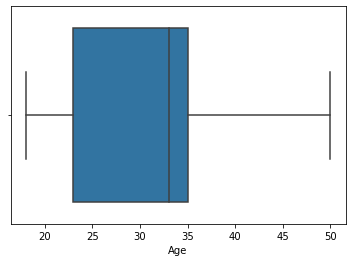

In [61]:
sns.boxplot(data = data, x= 'Age')

<AxesSubplot:xlabel='Salary'>

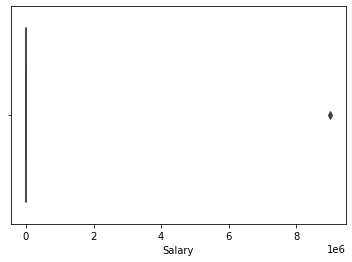

In [62]:
sns.boxplot(data = data, x= 'Salary')

In [64]:
!pip install mlxtend

     |████████████████████████████████| 1.4 MB 5.6 MB/s eta 0:00:01


In [104]:
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder

In [66]:
#Encoding - Process of transforming information in one form to another

In [ ]:
#1. One-Hot Encoding - Categorical Variables 
    #1.a Dummy variable Encoding - Leave one out
#2. Label Encoding - Non-Numerical Variables with order - Ordinal

In [69]:
data['Company'].value_counts()

a    14
b     9
c     9
d     1
Name: Company, dtype: int64

In [71]:
data['Company']

0     b
1     d
2     a
3     a
4     c
5     a
6     c
7     a
8     c
9     a
10    c
11    a
12    b
13    b
14    b
15    b
16    b
17    a
18    a
19    c
20    a
21    a
22    c
23    a
24    c
25    a
26    c
27    a
28    c
29    a
30    b
31    b
32    b
Name: Company, dtype: object

In [68]:
#One-Hot encoding where convert categorical variables into binary values of columns - Issues?
pd.get_dummies(data['Company']) #Vectorization of non-numerical variables!

,a,b,c,d
0,0,1,0,0
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
5,1,0,0,0
6,0,0,1,0
7,1,0,0,0
8,0,0,1,0
9,1,0,0,0


In [75]:
#Label encoding
data['Company'] = data['Company'].astype('category')

In [76]:
#Label Encoding -> Ordinal which has an inherent
data['Company'].cat.codes

0     1
1     3
2     0
3     0
4     2
5     0
6     2
7     0
8     2
9     0
10    2
11    0
12    1
13    1
14    1
15    1
16    1
17    0
18    0
19    2
20    0
21    0
22    2
23    0
24    2
25    0
26    2
27    0
28    2
29    0
30    1
31    1
32    1
dtype: int8

In [79]:
#Dummy variable encoding
pd.get_dummies(data['Company'],drop_first=True) #Vectorization of non-numerical variables!

,b,c,d
0,1,0,0
1,0,0,1
2,0,0,0
3,0,0,0
4,0,1,0
5,0,0,0
6,0,1,0
7,0,0,0
8,0,1,0
9,0,0,0


In [80]:
import category_encoders

1. Function Intitialization
2. Function fitting 
3. Fit transform

In [84]:
cat = category_encoders.LeaveOneOutEncoder()

In [91]:
category_encoders

Type:        module
String form: <module 'category_encoders' from '/Users/laxminarayen/opt/anaconda3/envs/openstream/lib/python3.8/site-packages/category_encoders/__init__.py'>
File:        ~/opt/anaconda3/envs/openstream/lib/python3.8/site-packages/category_encoders/__init__.py
Docstring:  
.. module:: category_encoders
  :synopsis:
  :platform:


In [87]:
cat

LeaveOneOutEncoder(cols=['Company'])

In [88]:
cat.fit_transform(data[['Company']],data['Salary']) #(X,Y) - X building the model, Y - Label to be predicted ?

LeaveOneOutEncoder(cols=['Company'])

In [ ]:
#Train - Model will see
#Test - Model will Evaluation

#### Transforming Numerical Variables..

In [93]:
#Standardisation / #Scaling

In [99]:
data['Age'] = data['Age'].astype('float')

In [102]:
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(data[['Salary','Age']])

In [103]:
scaled_columns

array([[ 5.65684832,  1.00849986],
       [-0.17922516,  0.15515382],
       [-0.1767452 , -0.21056591],
       [-0.1767452 , -1.42963167],
       [-0.1767452 , -0.21056591],
       [-0.17838207,  0.39896698],
       [-0.17792811,  1.00849986],
       [-0.17727958, -1.06391194],
       [-0.17663106,  0.15515382],
       [-0.17598253,  0.15515382],
       [-0.17533401, -1.06391194],
       [-0.17468548,  0.2770604 ],
       [-0.17403696,  1.61803275],
       [-0.1767452 , -1.06391194],
       [-0.17916744,  0.2770604 ],
       [-0.1767452 ,  1.61803275],
       [-0.1790734 , -1.67344483],
       [-0.17792811,  1.00849986],
       [-0.17792811, -1.06391194],
       [-0.17790865, -1.06391194],
       [-0.17663106,  0.2770604 ],
       [-0.1767452 , -1.18581852],
       [-0.1767452 ,  0.03324725],
       [-0.17789892,  0.64278013],
       [-0.17780878,  2.22756563],
       [-0.1767452 , -1.3077251 ],
       [-0.17608954,  0.15515382],
       [-0.17527953,  0.15515382],
       [-0.17407393,

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [110]:
scaler.fit_transform(data[['Salary','Age']])

array([[1.00000000e+00, 6.87500000e-01],
       [0.00000000e+00, 4.68750000e-01],
       [4.24936104e-04, 3.75000000e-01],
       [4.24936104e-04, 6.25000000e-02],
       [4.24936104e-04, 3.75000000e-01],
       [1.44460496e-04, 5.31250000e-01],
       [2.22246916e-04, 6.87500000e-01],
       [3.33370374e-04, 1.56250000e-01],
       [4.44493833e-04, 4.68750000e-01],
       [5.55617291e-04, 4.68750000e-01],
       [6.66740749e-04, 1.56250000e-01],
       [7.77864207e-04, 5.00000000e-01],
       [8.88987665e-04, 8.43750000e-01],
       [4.24936104e-04, 1.56250000e-01],
       [9.88998778e-06, 5.00000000e-01],
       [4.24936104e-04, 8.43750000e-01],
       [2.60028892e-05, 0.00000000e+00],
       [2.22246916e-04, 6.87500000e-01],
       [2.22246916e-04, 1.56250000e-01],
       [2.25580620e-04, 1.56250000e-01],
       [4.44493833e-04, 5.00000000e-01],
       [4.24936104e-04, 1.25000000e-01],
       [4.24936104e-04, 4.37500000e-01],
       [2.27247472e-04, 5.93750000e-01],
       [2.426936